Below follow PD03_processing_gold.ipynb

In [1]:
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_his_index=pd.read_csv("../../processed/his_index_tech_500_stable_14_24.csv")

In [5]:
df_his_index["Date"]=pd.to_datetime(df_his_index["Date"])

In [6]:
lst_date_we_care=df_his_index["Date"].to_list()

In [8]:
df_silv_1=pd.read_csv("../../raw/macro_daily/gold_and_silver_kaggle/silver prices.csv")

In [9]:
df_silv_1.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [11]:
df_silv_1["Date"]=pd.to_datetime(df_silv_1["Date"])

In [12]:
df_silv_1=df_silv_1.drop("Volume", axis=1)

In [13]:
df_silv_1

,Date,Close/Last,Open,High,Low
0,2023-08-17,23.042,22.800,23.385,22.725
1,2023-08-16,22.856,22.905,23.170,22.770
2,2023-08-15,22.656,22.650,22.770,22.265
3,2023-08-14,22.708,22.740,22.820,22.410
4,2023-08-11,22.743,22.760,22.910,22.610
...,...,...,...,...,...
2534,2013-08-23,23.781,23.235,24.140,22.935
2535,2013-08-22,23.080,22.920,23.365,22.500
2536,2013-08-21,23.009,23.020,23.400,22.810
2537,2013-08-20,23.118,23.200,23.350,22.320


In [14]:
df_silv_2=pd.read_csv("../../raw/macro_daily/gold_and_silver_kaggle/Silver prices (18.08.2023 - 22.01.2024).csv")

In [15]:
df_silv_2.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [16]:
df_silv_2["Date"]=pd.to_datetime(df_silv_2["Date"])

In [17]:
df_silv_2=df_silv_2.drop("Volume", axis=1)

In [18]:
df_silv_2

,Date,Close/Last,Open,High,Low
0,2024-01-22,22.296,22.745,22.78,22-Apr
1,2024-01-19,22.711,22.885,22.98,22.595
2,2024-01-18,22.807,22.715,22.9,22.52
3,2024-01-17,22.669,23.095,23-Nov,22.66
4,2024-01-16,23.093,23.350,23.5,23.015
...,...,...,...,...,...
102,2023-08-24,24.575,24.700,24.74,24.45
103,2023-08-23,24.710,23.795,24.75,23.79
104,2023-08-22,23.763,23.710,23.83,23.59
105,2023-08-21,23.659,23.130,23.7,23-Apr


In [19]:
df_silv_3=pd.read_csv("../../raw/macro_daily/gold_and_silver_kaggle/Silver Futures Historical Data (23.01.24-22.11.24).csv")

In [20]:
df_silv_3.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [21]:
df_silv_3["Date"]=pd.to_datetime(df_silv_3["Date"])

In [22]:
df_silv_3=df_silv_3.drop(["Vol.","Change %"],axis=1)

In [23]:
df_silv_3=df_silv_3.rename(columns={"Price":"Close/Last"})

In [24]:
df_silv_3

,Date,Close/Last,Open,High,Low
0,2024-11-22,31.422,30.815,31.453,30.810
1,2024-11-21,30.943,30.955,31.380,30.715
2,2024-11-20,31.005,31.305,31.420,30.860
3,2024-11-19,31.262,31.245,31.615,31.125
4,2024-11-18,31.224,30.370,31.355,30.350
...,...,...,...,...,...
217,2024-01-29,23.134,22.920,23.205,22.790
218,2024-01-26,22.758,22.905,22.955,22.715
219,2024-01-25,22.814,22.675,23.020,22.670
220,2024-01-24,22.769,22.460,22.950,22.375


In [27]:
df_silv=pd.concat([df_silv_1,df_silv_2,df_silv_3])

In [28]:
df_silv=df_silv.sort_values("Date")

In [29]:
df_silv

,Date,Close/Last,Open,High,Low
2538,2013-08-19,23.215,23.330,23.64,23.01
2537,2013-08-20,23.118,23.200,23.35,22.32
2536,2013-08-21,23.009,23.020,23.4,22.81
2535,2013-08-22,23.080,22.920,23.365,22.5
2534,2013-08-23,23.781,23.235,24.14,22.935
...,...,...,...,...,...
4,2024-11-18,31.224,30.370,31.355,30.35
3,2024-11-19,31.262,31.245,31.615,31.125
2,2024-11-20,31.005,31.305,31.42,30.86
1,2024-11-21,30.943,30.955,31.38,30.715


In [30]:
df_silv=df_silv.reset_index().drop("index",axis=1)

In [31]:
df_silv

,Date,Close/Last,Open,High,Low
0,2013-08-19,23.215,23.330,23.64,23.01
1,2013-08-20,23.118,23.200,23.35,22.32
2,2013-08-21,23.009,23.020,23.4,22.81
3,2013-08-22,23.080,22.920,23.365,22.5
4,2013-08-23,23.781,23.235,24.14,22.935
...,...,...,...,...,...
2863,2024-11-18,31.224,30.370,31.355,30.35
2864,2024-11-19,31.262,31.245,31.615,31.125
2865,2024-11-20,31.005,31.305,31.42,30.86
2866,2024-11-21,30.943,30.955,31.38,30.715


In [32]:
df_silv_care=df_silv[df_silv["Date"].isin(lst_date_we_care)].reset_index().drop("index",axis=1)

In [33]:
df_silv_care

,Date,Close/Last,Open,High,Low
0,2014-01-02,20.128,19.440,20.44,19.43
1,2014-01-03,20.128,20.015,20.325,19.985
2,2014-01-06,20.103,20.135,20.355,19.95
3,2014-01-07,19.787,20.180,20.28,19.625
4,2014-01-08,19.539,19.830,19.865,19.31
...,...,...,...,...,...
2563,2024-10-24,33.633,33.750,34.275,33.35
2564,2024-10-25,33.620,33.460,33.98,33.12
2565,2024-10-28,33.844,33.480,33.865,33.275
2566,2024-10-29,34.275,33.870,34.41,33.865


In [34]:
df_silv[df_silv.duplicated("Date")]

,Date,Close/Last,Open,High,Low


No missing :). No duplicated rows on "Date" :). 

In [36]:
lst_pro_change=[(df_silv_care.loc[df_silv_care["Date"]=="2014-01-02"]["Close/Last"].values[0]/df_silv_care.loc[df_silv_care["Date"]=="2014-01-02"]["Open"].values[0]-1)*100]

In [37]:
for index in range(1,2568): 
    lst_pro_change.append((df_silv_care.loc[index]["Close/Last"]/df_silv_care.loc[index-1]["Close/Last"]-1)*100)

In [38]:
df_silv_care["pro_change"]=lst_pro_change

We fix the 2017-07-06 data. 

In [39]:
df_silv_care.loc[df_silv_care["Date"]=="2017-07-06"]

,Date,Close/Last,Open,High,Low,pro_change
737,2017-07-06,15.983,16.055,16.08,15.91,-0.037526


In [40]:
df_silv_care.at[df_silv_care[df_silv_care["Date"]=="2017-07-06"].index[0],"pro_change"]=(df_silv_care.loc[df_silv_care["Date"]=="2017-07-06"]["Close/Last"].values[0]/df_silv_care.loc[df_silv_care["Date"]=="2017-07-06"]["Open"].values[0]-1)*100

In [41]:
df_silv_care.loc[df_silv_care["Date"]=="2017-07-06"]

,Date,Close/Last,Open,High,Low,pro_change
737,2017-07-06,15.983,16.055,16.08,15.91,-0.448458


In [44]:
df_silv_care=df_silv_care.drop(["High","Low"],axis=1)

In [45]:
df_silv_care

,Date,Close/Last,Open,pro_change
0,2014-01-02,20.128,19.440,3.539095
1,2014-01-03,20.128,20.015,0.000000
2,2014-01-06,20.103,20.135,-0.124205
3,2014-01-07,19.787,20.180,-1.571905
4,2014-01-08,19.539,19.830,-1.253348
...,...,...,...,...
2563,2024-10-24,33.633,33.750,-0.130653
2564,2024-10-25,33.620,33.460,-0.038653
2565,2024-10-28,33.844,33.480,0.666270
2566,2024-10-29,34.275,33.870,1.273490


In [46]:
df_silv_care.to_csv("../../processed/silv_daily_we_care.csv")

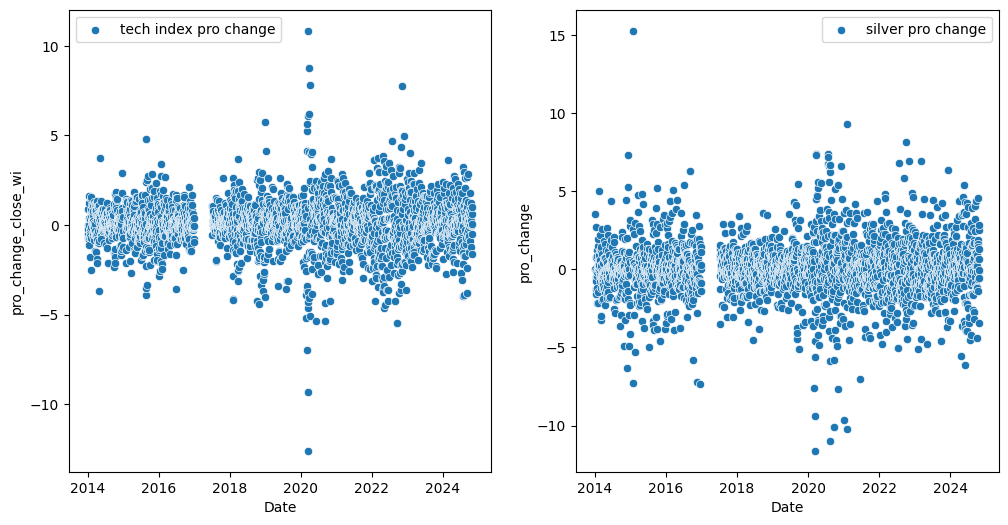

In [47]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(12,6))

sns.scatterplot(data=df_his_index, x="Date", y="pro_change_close_wi", label="tech index pro change", ax=ax[0])
sns.scatterplot(data=df_silv_care, x="Date", y="pro_change",label="silver pro change", ax=ax[1])

# ax[1].set_ylim(-25,25)

plt.show()